<div style=" background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Data & tests statistiques
</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt 
import seaborn as sns

# librairie pour analyses statistiques
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import kstest
from scipy.stats import linregress
from scipy.stats import spearmanr
import math

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression

In [101]:
df_stat = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

In [102]:
df_stat['categ'] = df_stat['categ'].astype(str)
df_stat['month'] = df_stat.index.month #ajout d'une colonne mois pour stratifier les échantillons plus tard
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  object 
 7   age         687534 non-null  int64  
 8   age_group   687534 non-null  object 
 9   month       687534 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 55.1+ MB


In [103]:
# Création de la colonne combinée 'strata'
df_stat['strat_sex_categ_mois'] = df_stat['categ'] + "_" + df_stat['sex'] + "_" + df_stat['month'].astype(str)
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois
Timestamp,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,56,56-65,3,0_f_3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,63,56-65,3,0_m_3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,35,36-45,3,0_m_3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,34,26-35,3,0_f_3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,67,66+,3,0_f_3
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,27,26-35,2,1_f_2
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,29,26-35,2,2_f_2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,38,36-45,2,1_f_2


#### Mes données sont-elles numériques (quantitatives) ou catégoriques (qualitatives) ?
- J'ai 2 variables quantitative et 5 variables catégoriques
#### Ecrire toutes les questions que je me pose

#### Quel est le nombre de groupes ou de variables que je compare ?

#### Quel est l'objectif de mon étude ? Que cherche-je à déterminer ou à comparer ?

<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Partie 1 - Test de normalité des données
</h2>
</div>

----
## Test de normalité sur une variable : prix
---

---
### 1.1 Choisir la variable à tester (variable quanti) -> Prix
---

In [104]:
df_stat['price'].head(2)

Timestamp
2021-03-01 00:01:07.843138    11.99
2021-03-01 00:02:26.047414    19.37
Name: price, dtype: float64

#### H0 : la variable prix suit une loi normal p > 0,05
#### H1 : la variable prix ne suit pas une loi normal p < 0,05


---
### 1.2 - Décrire les paramère de la variable (moyenne , écart-type (std) , variance (var) ) théorique
---

In [105]:
print(f"la moyenne (x barre) théorique est {round(df_stat['price'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['price'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['price'].var(), 2)}")

la moyenne (x barre) théorique est 17.49
l'écart type ou stand.dev. (sigma) théorique est 18.24
la variance (sigma carré) théorique est de 332.64


---
### 1.3 - Détérminer un échantillon (mathématiquement)
---

In [106]:
## Fixation de la taille de l'échantillon       

# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 18.24  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_prix = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_prix = math.ceil(taille_echantillon_prix)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_prix)


"Taille d'échantillon nécessaire :"

1279

---
### 1.4 - Stratifié l'échantillon pour fiabiliser la représentativité des données
---

- le sexe (639 hommes et 639 femmes)
- la catégorie de produit
- le mois de l'année (saisonnalité)

In [107]:
taille_echantillon_prix = 1279 #je fixe la taille de l'échantillon à 1300

sss = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_prix, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-03-14 09:45:18.837501  0_1718   s_178941    c_5283   m   1969   9.67   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-03-14 09:45:18.837501     0   54     46-55      3                0_m_3  


'-----------------------------'

strat_sex_categ_mois
0_m_9     38
0_f_9     37
0_m_5     35
0_m_12    34
0_f_3     34
          ..
2_m_9      2
2_f_3      2
2_f_10     2
2_f_12     2
2_f_9      2
Name: count, Length: 72, dtype: int64


---
### 1.5 - Appliquer le test de Kosmogorov-Smirnov
---

In [108]:
moyenne_empirique_prix =echantillon_stratifie['price'].mean() #je calcule la moyenne des prix dans l'échantillon stratifié
variante_empirique_prix = echantillon_stratifie['price'].std() #je calcule l'écart-type des prix dans l'échantillon stratifié
display(round(moyenne_empirique_prix, 2))
display(round(variante_empirique_prix, 2))
display("-----------------------------")

stat, p_value = kstest(echantillon_stratifie['price'], 'norm', args=(moyenne_empirique_prix, np.sqrt(variante_empirique_prix))) #je teste la normalité de la distribution des prix dans l'échantillon stratifié

display("-----------------------------")

print("Statistique de test KS:", round(stat, 5), 'un resultat proche de 0 indique que la distribution des prix est normale')
print("Valeur p:", np.format_float_positional(p_value, precision=2), ': un resultat supérieur à 0.05 indique que la distribution des prix est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%
if p_value > alpha:
    print("La distribution des prix est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée")
    

17.73

19.66

'-----------------------------'

'-----------------------------'

Statistique de test KS: 0.33169 un resultat proche de 0 indique que la distribution des prix est normale
Valeur p: 0.00 : un resultat supérieur à 0.05 indique que la distribution des prix est normale


'-----------------------------'

La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée


<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

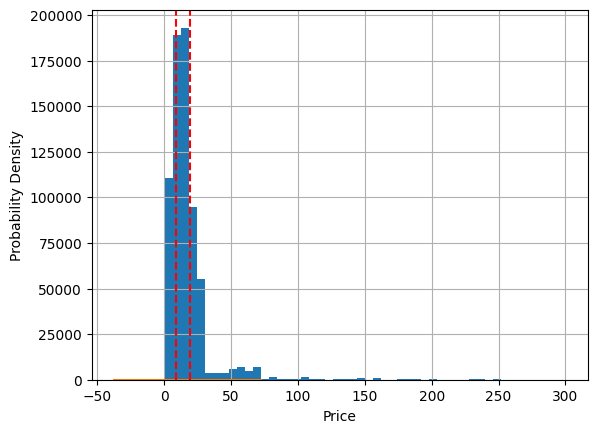

In [109]:
df_stat['price'].hist(bins=50)

# Generate data for the normal distribution
mu = df_stat['price'].mean()
sigma = df_stat['price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['price'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['price'], 75), color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()

---
### On retiens l'hypothèse alternative H1 : la variable prix ne suit pas une loi normal p > 0.05
---

<div style="background-color: rgb(343, 197, 37);" >
</div>

----
## Test de normalité sur une variable : année de naissance
---

#### H0 : la variable naissance suit une loi normal p > 0,05
#### H1 : la variable naissance ne suit pas une loi normal p < 0,05


In [110]:
# choix de la variable à étudier : année de naissance
df_stat['birth'].head(2)   

Timestamp
2021-03-01 00:01:07.843138    1967
2021-03-01 00:02:26.047414    1960
Name: birth, dtype: int64

In [111]:
print(f"la moyenne (x barre) théorique est {round(df_stat['birth'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['birth'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['birth'].var(), 2)}")

la moyenne (x barre) théorique est 1977.82
l'écart type ou stand.dev. (sigma) théorique est 13.61
la variance (sigma carré) théorique est de 185.18


In [112]:
## Fixation de la taille de l'échantillon       
# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 13.61  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_naissance = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_naissance = math.ceil(taille_echantillon_naissance)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_naissance)

"Taille d'échantillon nécessaire :"

712

In [113]:
taille_echantillon_naissance = 750 #je fixe la taille de l'échantillon à 750

sss2 = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_naissance, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss2.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie_naissance = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie_naissance.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie_naissance['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-06-22 19:56:21.825668  0_1449   s_227747    c_1609   m   1980   4.99   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-06-22 19:56:21.825668     0   43     36-45      6                0_m_6  


'-----------------------------'

strat_sex_categ_mois
0_m_9     22
0_f_9     22
0_m_5     20
0_m_4     20
0_m_12    20
          ..
2_f_11     1
2_m_9      1
2_m_12     1
2_f_9      1
2_f_10     1
Name: count, Length: 72, dtype: int64


In [114]:
moyenne_empirique_naissance = echantillon_stratifie_naissance['birth'].mean() #je calcule la moyenne des années de naissance dans l'échantillon stratifié
display(round(moyenne_empirique_naissance, 2))
variante_empirique_naissance = echantillon_stratifie_naissance['birth'].var() #je calcule la variance des années de naissance dans l'échantillon stratifié
display(round(variante_empirique_naissance, 2))

1978.89

185.71

In [115]:
stat, p_value = kstest(echantillon_stratifie_naissance['birth'], 'norm', args=(moyenne_empirique_naissance, np.sqrt(variante_empirique_naissance))) #je teste la normalité de la distribution des années de naissance dans l'échantillon stratifié

display(f"Le resultat du test de normalité est :", {round(stat, 2)}, 'un resultat proche de 0 indique que la distribution des années de naissance est normale')
display(f"Le resultat du test de normalité est :", {round(p_value, 2)}, ': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%

if p_value > alpha:
    print("La distribution des années de naissance est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée")

'Le resultat du test de normalité est :'

{0.09}

'un resultat proche de 0 indique que la distribution des années de naissance est normale'

'Le resultat du test de normalité est :'

{0.0}

': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale'

'-----------------------------'

La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

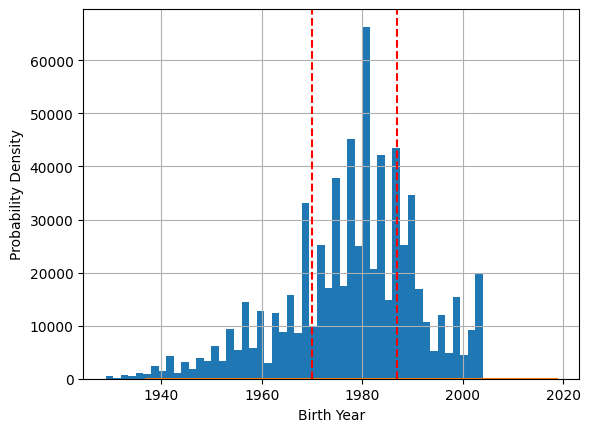

In [116]:
df_stat['birth'].hist(bins=50)

mu = df_stat['birth'].mean()
sigma = df_stat['birth'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['birth'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['birth'], 75), color='r', linestyle='--')
plt.xlabel('Birth Year')
plt.ylabel('Probability Density')
plt.show()

---
### On retiens l'hypothèse alternative H1 : la variable naissance ne suit pas une loi normal p > 0.05
---

<div style="background-color: rgb(343, 197, 37);" >
</div>

In [117]:
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois
Timestamp,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,56,56-65,3,0_f_3
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,63,56-65,3,0_m_3
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,35,36-45,3,0_m_3
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,34,26-35,3,0_f_3
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,67,66+,3,0_f_3
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,27,26-35,2,1_f_2
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,29,26-35,2,2_f_2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,38,36-45,2,1_f_2


---
### test de normalité age
---

In [118]:
df_stat['age'].head(2)

Timestamp
2021-03-01 00:01:07.843138    56
2021-03-01 00:02:26.047414    63
Name: age, dtype: int64

#### H0 : la variable naissance suit une loi normal p > 0,05
#### H1 : la variable naissance ne suit pas une loi normal p < 0,05

In [119]:
print(f"la moyenne (x barre) théorique est {round(df_stat['age'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['age'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['age'].var(), 2)}")

la moyenne (x barre) théorique est 45.18
l'écart type ou stand.dev. (sigma) théorique est 13.61
la variance (sigma carré) théorique est de 185.18


In [120]:
## Fixation de la taille de l'échantillon       
# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 13.61  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon_age = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon_age = math.ceil(taille_echantillon_age)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon_age)

"Taille d'échantillon nécessaire :"

712

In [121]:
taille_echantillon_age = 750 #je fixe la taille de l'échantillon à 750

sss2 = StratifiedShuffleSplit(n_splits=40, test_size=taille_echantillon_age, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['strat_sex_categ_mois']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie_age = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie_age.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie_age['strat_sex_categ_mois'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-03-14 09:45:18.837501  0_1718   s_178941    c_5283   m   1969   9.67   

                           categ  age age_group  month strat_sex_categ_mois  
Timestamp                                                                    
2022-03-14 09:45:18.837501     0   54     46-55      3                0_m_3  


'-----------------------------'

strat_sex_categ_mois
0_m_9     38
0_f_9     37
0_m_5     35
0_m_12    34
0_f_3     34
          ..
2_m_9      2
2_f_3      2
2_f_10     2
2_f_12     2
2_f_9      2
Name: count, Length: 72, dtype: int64


In [122]:
moyenne_empirique_age = echantillon_stratifie_age['age'].mean() #je calcule la moyenne des années de naissance dans l'échantillon stratifié
display(round(moyenne_empirique_age, 2))
variante_empirique_age = echantillon_stratifie_age['age'].var() #je calcule la variance des années de naissance dans l'échantillon stratifié
display(round(variante_empirique_age, 2))

44.82

183.51

In [123]:
stat, p_value = kstest(echantillon_stratifie_age['age'], 'norm', args=(moyenne_empirique_age, np.sqrt(moyenne_empirique_age))) #je teste la normalité de la distribution des années de naissance dans l'échantillon stratifié

display(f"Le resultat du test de normalité est :", {round(stat, 2)}, 'un resultat proche de 0 indique que la distribution des années de naissance est normale')
display(f"Le resultat du test de normalité est :", {round(p_value, 2)}, ': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale')

display("-----------------------------")

alpha = 0.05 #je fixe la région critique à 5%

if p_value > alpha:
    print("La distribution des années de naissance est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée")

'Le resultat du test de normalité est :'

{0.19}

'un resultat proche de 0 indique que la distribution des années de naissance est normale'

'Le resultat du test de normalité est :'

{0.0}

': un resultat supérieur à 0.05 indique que la distribution des années de naissance est normale'

'-----------------------------'

La distribution des années de naissance n'est pas normale -> l'hypothèse nulle H0 est rejetée


<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Partie 2 - Tests statistiques de corrélation
</h2>
</div>


---
### Test de corrélation entre le genre et la catégorie de produit : Test du Chi2 d'Indépendance
---

### -> Question : La proportion de catégorie de produits est la même chez les Hommes et Femmes ?

#### H0 : Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)

#### H1 : Le genre du client est corréler à la catégorie de produit acheter. (au moins une des catég et davantage choisi selon le genre)

In [124]:
#Variables qualitatives (catégoriques)
correl_age_categ = df_stat[['sex', 'categ']]
correl_age_categ

,sex,categ
Timestamp,,
2021-03-01 00:01:07.843138,f,0
2021-03-01 00:02:26.047414,m,0
2021-03-01 00:02:38.311413,m,0
2021-03-01 00:04:54.559692,f,0
2021-03-01 00:05:18.801198,f,0
...,...,...
2023-02-28 23:49:03.148402,f,1
2023-02-28 23:51:29.318531,f,2
2023-02-28 23:53:18.929676,f,1


### Création du tableau de contingence/fréquence de Khi2 d'indépendence

In [125]:
df_contingence = pd.crosstab(correl_age_categ['sex'], correl_age_categ['categ'])
df_contingence

categ,0,1,2
sex,,,
f,206103,119307,17283
m,209356,116285,19200


In [126]:
# Calculer le test du Khi2 d'indépendance
chi2, p, dof, expected = chi2_contingency(df_contingence)

# Afficher les résultats
print(f"Chi2 Statistique: {chi2}")
print('---------------------------------')
print(f"P-valeur: {p}")
print('---------------------------------')
print(f"Degrés de liberté: {dof}")
print('---------------------------------')
print("Fréquences attendues:\n", expected)
print('---------------------------------')

alpha = 0.05
if p < alpha:
    print("Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)")
else:
    print("Le genre du client est corréler à la catégorie de produit acheter. (au moins une des catég et davantage choisi selon le genre)")

Chi2 Statistique: 158.25417617304882
---------------------------------
P-valeur: 4.3205822283997063e-35
---------------------------------
Degrés de liberté: 2
---------------------------------
Fréquences attendues:
 [[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]
---------------------------------
Le genre du client est indépendant de la catégorie de produit acheter. (proportion équivalente entre H et F)



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

Text(120.72222222222221, 0.5, 'Sexe')

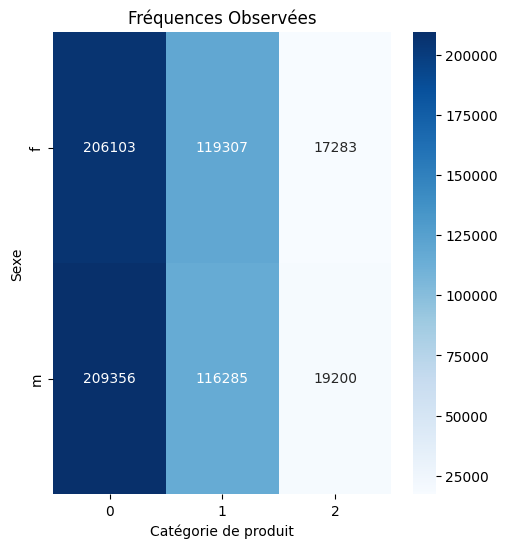

In [127]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df_contingence, annot=True, fmt='d', cmap='Blues')
plt.title('Fréquences Observées')
plt.xlabel('Catégorie de produit')
plt.ylabel('Sexe')

---
#### On retient H0 : Le genre est indépendant de la catégorie de produit. (proportion équivalente entre H et F)
---

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et le montant d'achat : Coeff de corrélation de Spearman
---

### -> Question : Le montant d'achat est-il corréler à l'âge d'un individu ?

#### H0 : Il n'y a pas de corrélation entre l'âge et le montant d'achat dans la population. => coeff = 0

#### H1 : Il y a une corrélation entre l'âge et le montant d'achat dans la population. => coeff != 0

In [128]:
df_coeff_correl = df_stat[['price', 'age']]
df_coeff_correl

,price,age
Timestamp,,
2021-03-01 00:01:07.843138,11.99,56
2021-03-01 00:02:26.047414,19.37,63
2021-03-01 00:02:38.311413,4.50,35
2021-03-01 00:04:54.559692,6.55,34
2021-03-01 00:05:18.801198,16.49,67
...,...,...
2023-02-28 23:49:03.148402,21.92,27
2023-02-28 23:51:29.318531,48.99,29
2023-02-28 23:53:18.929676,26.99,38


In [129]:
# Calcul de la corrélation et de la p-valeur
correlation, p_value = spearmanr(df_coeff_correl['age'], df_coeff_correl['price'])

print(f"Coefficient de corrélation: {correlation}")
print('---------------------------------')
print(f"P-valeur: {p_value}")
print('---------------------------------')

alpha = 0.005 #je fixe la région critique à 0,5% pour m'assurer de la corrélation
if p_value < alpha: #je teste si la p-valeur(proba d'avoir l'age et le montant d'achat ensemble) est inférieure à 1%
    print("H1 validé ; Une corrélation existe entre l'âge et le prix des produits => coeff != 0")
else:
    print("H0 validé ; Aucune corrélation n'existe entre l'âge et le prix => coeff = 0")


Coefficient de corrélation: -0.05546489462128308
---------------------------------
P-valeur: 0.0
---------------------------------
H1 validé ; Une corrélation existe entre l'âge et le prix des produits => coeff != 0



<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

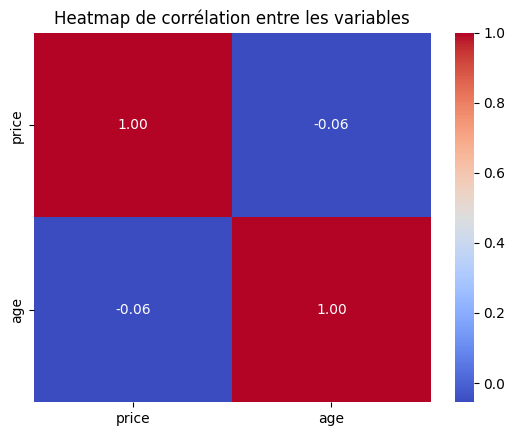

In [130]:
sns.heatmap(df_coeff_correl.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les variables')
plt.show()

---
#### On retient H1 : Il y a une corrélation entre l'âge et le montant d'achat dans la population. => coeff != 0
---

#### Interprétation : le montant d'achat à tendance à baisser avec l'âge (coeff négatif mais proche de 0)

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et la fréquence d'achat : Modèle de régréssion linéaire
---

In [131]:
#Création d'une variable 'frequence_achat' qui contient le nombre d'achat 
df_stat['frequence_achat'] = 1

#Aggrégation des données par client et par âge pour plus de précision dans l'analyse
data_aggregated = df_stat.groupby(['client_id', 'age'])['frequence_achat'].sum().reset_index()
data_aggregated = data_aggregated.sort_values(by='frequence_achat', ascending=False).reset_index(drop=True)
data_aggregated_no_outliers = data_aggregated.loc[data_aggregated['frequence_achat'] < 5000 ] #je filtre les valeurs extrêmes
data_aggregated_no_outliers


,client_id,age,frequence_achat
4,c_2140,46,405
5,c_3263,38,403
6,c_2595,49,398
7,c_2077,39,386
8,c_1637,35,384
...,...,...,...
8595,c_4478,53,1
8596,c_4223,72,1
8597,c_4648,19,1
8598,c_1624,31,1


Le coefficient de régression est : 0.12397308565027175
Constante de régression est : 74.39934459434566


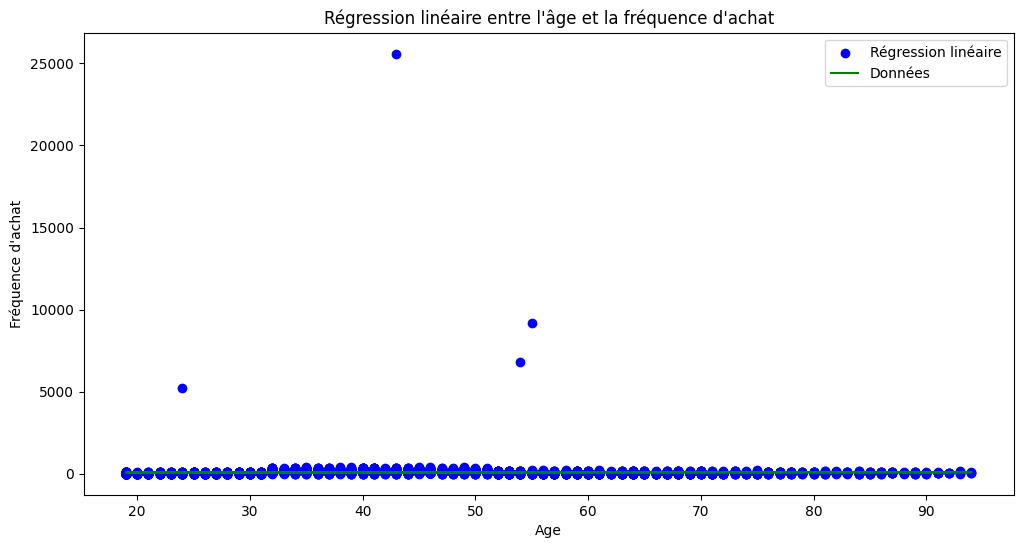

In [144]:
#création du modèle de régression linéaire
model = LinearRegression()

X = data_aggregated[['age']] #variable indépendante
y = data_aggregated['frequence_achat'] #variable dépendante


# X variable indépendante (âge), y variable dépendante (fréquence d'achat)
model.fit(X, y) #je fais apprendre le modèle sur les données

print(f"Le coefficient de régression est : {model.coef_[0]}")
print(f"Constante de régression est : {model.intercept_}")

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='green')
plt.xlabel('Age')
plt.ylabel('Fréquence d\'achat')
plt.title('Régression linéaire entre l\'âge et la fréquence d\'achat')
plt.legend(['Régression linéaire', 'Données'])
plt.show()

### PS : Graphique ci-dessus biaisé par des outliers



Le coefficient de régression est : 0.12208662555439166
Constante de régression est : 69.07651016415087


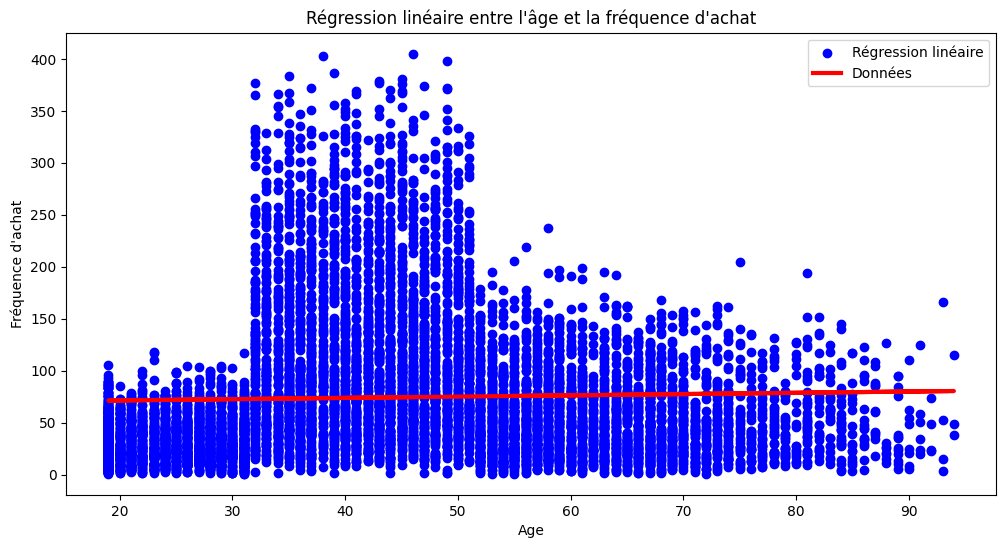

In [148]:
#création du modèle de régression linéaire
model = LinearRegression()

A = data_aggregated_no_outliers[['age']] #variable indépendante
b = data_aggregated_no_outliers['frequence_achat'] #variable dépendante

# X variable indépendante (âge), y variable dépendante (fréquence d'achat)
model.fit(A, b) #je fais apprendre le modèle sur les données

print(f"Le coefficient de régression est : {model.coef_[0]}")
print(f"Constante de régression est : {model.intercept_}")

plt.figure(figsize=(12, 6))
plt.scatter(A, b, color='blue')
plt.plot(A, model.predict(A), color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Fréquence d\'achat')
plt.title('Régression linéaire entre l\'âge et la fréquence d\'achat')
plt.legend(['Régression linéaire', 'Données'])
plt.show()



#### Le coefficient de régression est de 0.12, ce qui signifie que pour chaque année supplémentaire, la fréquence d'achat augmente de 0.12. La constante de régression est de 69.08, ce qui signifie que pour un client de 0 an, la fréquence d'achat est de 69.08. La régression linéaire montre une relation positive entre l'âge et la fréquence d'achat. Cela signifie que plus un client est âgé, plus il achète fréquemment.

### conclusion : la fréquence d'achat augmente avec l'âge du client (coeff > 0)

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et la taille du panier moyen
---

### -> Question : Le panier moyen est-il corréler à l'âge d'un individu ?

#### H0 : Il n'y a pas de corrélation entre l'âge et le montant du panier moyen. => coeff = 0

#### H1 : Il y a une corrélation entre l'âge et le montant du panier moyen. => coeff != 0

In [134]:
correl_age_mu = df_stat.groupby(['client_id', 'age'])['price'].mean().reset_index()
correl_age_mu

,client_id,age,price
0,c_1,68,14.628372
1,c_10,67,23.337931
2,c_100,31,31.856250
3,c_1000,57,18.189524
4,c_1001,41,17.707282
...,...,...,...
8595,c_995,68,13.529286
8596,c_996,53,17.055625
8597,c_997,29,25.254407
8598,c_998,22,51.313091


In [135]:
correlation, p_value = spearmanr(correl_age_mu['age'], correl_age_mu['price'])

print(f"Coefficient de corrélation: {correlation}")
print('---------------------------------')
print(f"P-valeur: {p_value}")
print('---------------------------------')

alpha = 0.005 #je fixe la région critique à 0,5% pour m'assurer de la corrélation
if p_value < alpha: #je teste si la p-valeur(proba d'avoir l'age et le panier moyen) est inférieure à 0,5%
    print("H1 validé ; Il y a une corrélation entre l'âge et le montant du panier moyen. => coeff != 0")
else:
    print("H0 validé: Il n'y a pas de corrélation entre l'âge et le montant du panier moyen. => coeff = 0")

Coefficient de corrélation: -0.3258367629603617
---------------------------------
P-valeur: 7.363415077094604e-212
---------------------------------
H1 validé ; Il y a une corrélation entre l'âge et le montant du panier moyen. => coeff != 0


#### On a ici un coefficient de corrélation négatif de -0.32 , ce qui veut dire que le montant du panier tend à baisser lorsque l'âge augmente

---
#### On retient H1 : Il y a une corrélation entre l'âge et le montant du panier moyen. => coeff != 0
---

<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

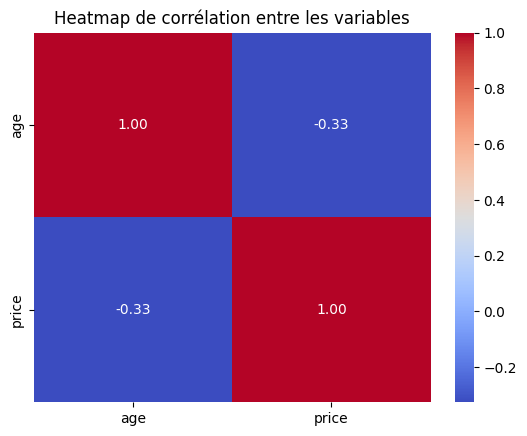

In [136]:
def drop_column(df):
    return df.drop(columns=['client_id'])
correl_age_mu2 = drop_column(correl_age_mu)


sns.heatmap(correl_age_mu2.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les variables')
plt.show()

<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Test de corrélation entre l'âge et la catégorie de produit : Test ANOVA
---

### Hypothèse nulle (H0) : Les moyennes de tous les groupes sont égales => mu = mu
### Hypothèse alternative (H1) : Au moins une moyenne de groupe est différente des autres. => mu != mu

In [137]:
group_0 = df_stat[df_stat['categ'] == '0']['age']
group_1 = df_stat[df_stat['categ'] == '1']['age']
group_2 = df_stat[df_stat['categ'] == '2']['age']

In [138]:
# ANOVA
f_statistic, p_value = f_oneway(group_0, group_1, group_2)

print('Statistique F:', f_statistic)
print('p-value:', p_value)

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une différence significative entre les moyennes d'âge des différentes catégories de livres.")
else:
    print("Il n'y a pas de différence significative entre les moyennes d'âge des différentes catégories de livres.")

Statistique F: 45120.03553567384
p-value: 0.0
Il y a une différence significative entre les moyennes d'âge des différentes catégories de livres.


---
#### On retient H1 : Il y a une corrélation entre l'âge moyen et la catégorie de livre => coeff != 0
---

<div style="background-color: rgb(343, 197, 37);" >
</div>

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1   3.6118   0.0   3.5345   3.6891   True
     0      2 -17.9494   0.0 -18.1132 -17.7857   True
     1      2 -21.5612   0.0 -21.7299 -21.3925   True
-----------------------------------------------------


'---------------------------------'

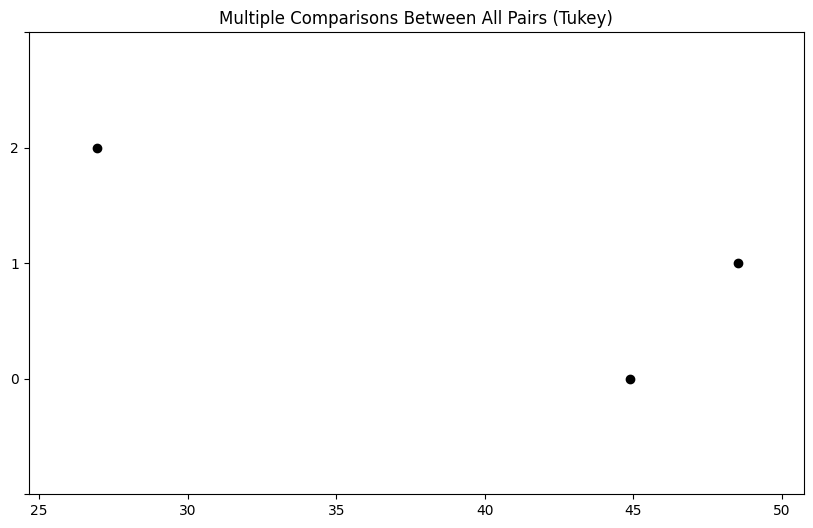

In [139]:
# Test de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Créer un DataFrame pour le test de Tukey
df_tukey = pd.DataFrame({'vals': np.concatenate([group_0, group_1, group_2]),
                         'group': np.concatenate([['0'] * len(group_0), ['1'] * len(group_1), ['2'] * len(group_2)])})

# Réaliser le test de Tukey
tukey = pairwise_tukeyhsd(endog=df_tukey['vals'], groups=df_tukey['group'], alpha=0.05)

# Afficher les résultats
print(tukey)
display('---------------------------------')
# Test de Tukey
tukey.plot_simultaneous()
plt.show()


<div style="background-color: rgb(343, 197, 37);" >
</div>


---
### Profil des clients : Courbe de Lorenz
---

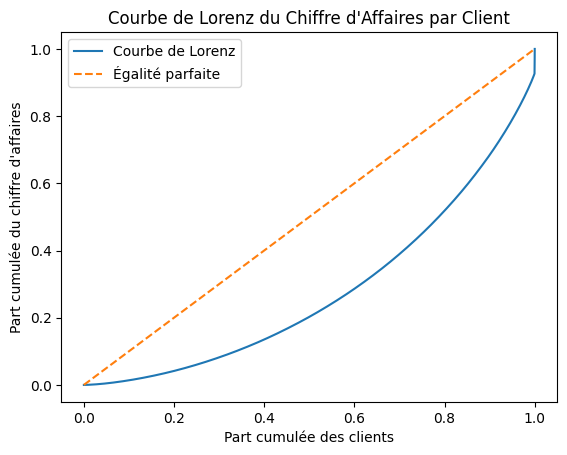

In [140]:
chiffre_affaires_client = df_stat.groupby('client_id')['price'].sum()

chiffre_affaires_tries = chiffre_affaires_client.sort_values()

cumul_chiffre_affaires = np.cumsum(chiffre_affaires_tries)
cumul_chiffre_affaires = cumul_chiffre_affaires / cumul_chiffre_affaires.iloc[-1]  # Normaliser

cumul_clients = np.arange(1, len(chiffre_affaires_tries) + 1) / len(chiffre_affaires_tries)

# Tracer la courbe de Lorenz
plt.plot(cumul_clients, cumul_chiffre_affaires, label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], '--', label="Égalité parfaite")
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.title("Courbe de Lorenz du Chiffre d'Affaires par Client")
plt.legend()
plt.show()



In [141]:
# calcul du coefficient de Gini
aire_sous_courbe_lorenz = cumul_chiffre_affaires[:-1].sum() / len(cumul_chiffre_affaires)
aire_sur_diagonale = 0.5
gini = (aire_sur_diagonale - aire_sous_courbe_lorenz) / aire_sur_diagonale
gini

0.4420121590259247

---
### Conclusion : le coefficient de Gini est proche de 0,5 ce qui signifie que la distribution du chiffre d'affaires par client est équitable
---

### Il a été demandé un test t de student et/ou de justifier l'utilisation ou non ce test : 

#### Le test de student est un test paramétrique (distribution normale dans la variable quanti choisi) or aucune de nos variables quantitative ne respecte une loi de distribution normale (cf. Partie 1 sur les tests de normalité). Par conséquent, on ne peut pas interpreter avec fiabilité les résultats de ce test. Donc nous ne l'utiliserons pas dans notre projet.

In [143]:
df_stat.to_csv('../Source/Data_processed/to_main.csv', sep=';', index=True) #je sauvegarde le fichier